In [1]:
pip install yfinance


  Created wheel for yfinance: filename=yfinance-0.1.62-py2.py3-none-any.whl size=23859 sha256=b7a405cdb3a1f7b890aeeba23121d4c3b7a7328d5012d7b9968cf52f3958c8ef
  Stored in directory: /root/.cache/pip/wheels/4c/3a/2e/53936bb0b112189d5532492b32dd8f3e442cba9d832ceef3b6
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8368 sha256=f00483936cf5160e8b7ee604001f1be64dabf3046205920d349235a98a914a5d
  Stored in directory: /root/.cache/pip/wheels/ae/25/47/4d68431a7ec1b6c4b5233365934b74c1d4e665bf5f968d363a
Successfully built yfinance multitasking
Note: you may need to restart the kernel to use updated packages.


In [2]:
import datetime

In [3]:
import yfinance as yf
import pandas as pd

# Fetch Price

In [6]:
BTC_price = yf.download(tickers='BTC-USD', period = '4y', interval = '1d')['Adj Close']
BTC_price.head()

[*********************100%***********************]  1 of 1 completed


Date
2017-07-10    2372.560059
2017-07-11    2337.790039
2017-07-12    2398.840088
2017-07-13    2357.899902
2017-07-14    2233.340088
Name: Adj Close, dtype: float64

In [7]:
BTC_price.tail()

Date
2021-07-06    34235.195312
2021-07-07    33855.328125
2021-07-08    32877.371094
2021-07-09    33798.011719
2021-07-10    33745.109375
Name: Adj Close, dtype: float64

# Plots

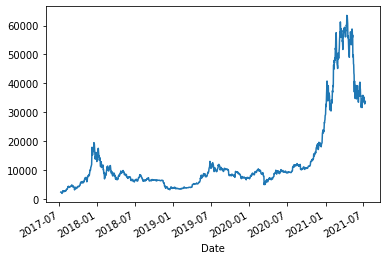

In [10]:
import matplotlib.pyplot as plt
BTC_price.plot()
plt.show()

In [43]:
BTC_daily_returns = BTC_price.pct_change().dropna(axis=0)
type(BTC_price)

pandas.core.series.Series

In [13]:
BTC_daily_cum_returns = (BTC_daily_returns +1).cumprod()-1
BTC_daily_cum_returns

Date
2017-07-11    -0.014655
2017-07-12     0.011077
2017-07-13    -0.006179
2017-07-14    -0.058679
2017-07-15    -0.157509
                ...    
2021-07-06    13.429643
2021-07-07    13.269535
2021-07-08    12.857340
2021-07-09    13.245377
2021-07-10    13.223079
Name: Adj Close, Length: 1457, dtype: float64

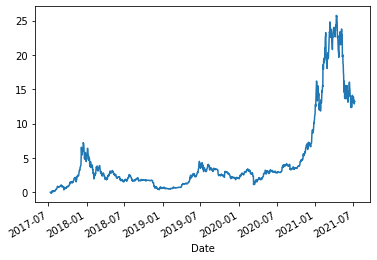

In [14]:
BTC_daily_cum_returns.plot()
plt.show()

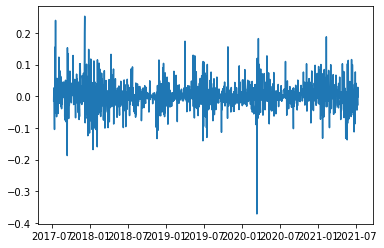

In [33]:
fig, axs = plt.subplots(1,1,gridspec_kw={'hspace':0.2,'wspace':0.1})
axs.plot(BTC_daily_returns)

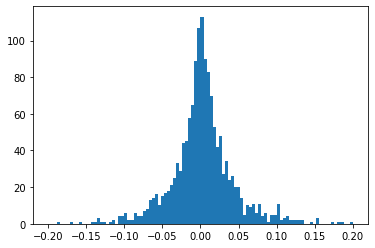

In [38]:
fig, axs = plt.subplots(1,1,gridspec_kw={'hspace':0.2,'wspace':0.1})
axs.hist(BTC_daily_returns,bins=100,range=(-0.2,0.2))
plt.show()

In [46]:
BTC_price1 = yf.download(tickers='BTC-USD', period = '4y', interval = '1d')
BTC_price1.head()
type(BTC_price1)

[*********************100%***********************]  1 of 1 completed


pandas.core.frame.DataFrame

In [47]:
BTC_daily_returns1 = BTC_price1.pct_change().dropna(axis=0)
type(BTC_daily_returns1)

pandas.core.frame.DataFrame

In [52]:
BTC_daily_returns = BTC_daily_returns1['Adj Close']
type(BTC_daily_returns)

pandas.core.series.Series

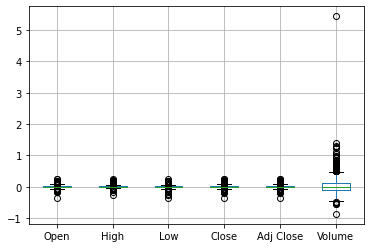

In [50]:
#fig, axs = plt.subplots(1,1,gridspec_kw={'hspace':0.2,'wspace':0.1})
BTC_daily_returns1.boxplot()#column='Adj Close')
plt.show()

# Prediction

In [53]:
pip install Prophet

     |████████████████████████████████| 65 kB 781 kB/s eta 0:00:01
     |████████████████████████████████| 49 kB 2.1 MB/s eta 0:00:01
  Created wheel for Prophet: filename=prophet-1.0.1-py3-none-any.whl size=6644494 sha256=c5e427c4bb8eef92d1fee0958352bd66f14ca8f847cf06b2f4ed1d6a647b671d
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built Prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [181]:
from fbprophet import Prophet
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [184]:
import datetime as dt


In [185]:
BTC_df = yf.download(tickers='BTC-USD', period = '10y', interval = '1d')

[*********************100%***********************]  1 of 1 completed


In [186]:
modelfb = Prophet()
BTC_df = BTC_df.reset_index()
BTC_df[['ds','y']] = BTC_df[['Date','Adj Close']]
modelfb.fit(BTC_df)


In [188]:
future = modelfb.make_future_dataframe(periods=365)

In [189]:
forecast = modelfb.predict(future)

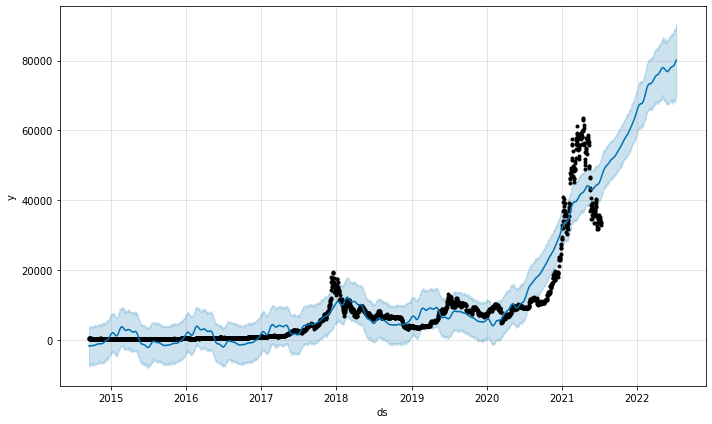

In [190]:
modelfb.plot(forecast)
plt.show()